<a href="https://colab.research.google.com/github/jujhaar2409/unClear/blob/master/assignments/MNIST_num_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST numbers recognition

## Importing some packages that we will be using

In [2]:
import tensorflow as tf
import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

### Getting raw data from google  drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')
testdf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
traindf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

Mounted at /content/drive


### Formatting data correctly

The data must be in the correct shape(ie, no. of items, 28, 28, 1) and must be normalized so that each pixel value lies between 0 and 1.

In [83]:
y_train = np.array(traindf.iloc[:, 0].values)

x_train = np.array(traindf.iloc[:, 1:].values)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_train_normalized = x_train / 255

x_test = np.array(testdf.iloc[:, :].values)
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_test_normalized = x_test / 255

## Defining and Training the model

### Definition of the model

In [86]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_84 (Dense)             (None, 64)                692288    
_________________________________________________________________
dense_85 (Dense)             (None, 10)                650       
Total params: 693,578
Trainable params: 693,578
Non-trainable params: 0
_______________________________________________

### Training the model

In [87]:
def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split, verbose=1)
  
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist 

learning_rate = 0.005
epochs = 25
batch_size = 300
validation_split = 0.1

epochs, hist = train_model(model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

Epoch 1/25
126/126 [==============================] - 3s 18ms/step - loss: 0.7733 - accuracy: 0.7766 - val_loss: 0.1726 - val_accuracy: 0.9500
Epoch 2/25
126/126 [==============================] - 2s 15ms/step - loss: 0.1569 - accuracy: 0.9555 - val_loss: 0.1076 - val_accuracy: 0.9664
Epoch 3/25
126/126 [==============================] - 2s 14ms/step - loss: 0.1014 - accuracy: 0.9699 - val_loss: 0.0818 - val_accuracy: 0.9738
Epoch 4/25
126/126 [==============================] - 2s 14ms/step - loss: 0.0809 - accuracy: 0.9763 - val_loss: 0.0691 - val_accuracy: 0.9764
Epoch 5/25
126/126 [==============================] - 2s 15ms/step - loss: 0.0644 - accuracy: 0.9811 - val_loss: 0.0651 - val_accuracy: 0.9800
Epoch 6/25
126/126 [==============================] - 2s 15ms/step - loss: 0.0583 - accuracy: 0.9817 - val_loss: 0.0582 - val_accuracy: 0.9814
Epoch 7/25
126/126 [==============================] - 2s 15ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0537 - val_accuracy: 0.9819

### Visualizing the results

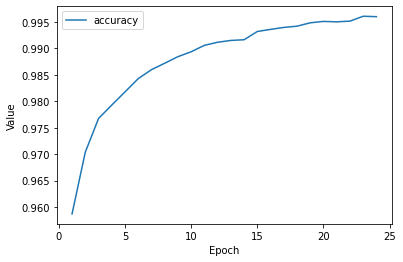

In [88]:
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")
  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)
  plt.legend()
  
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

## Running our model on the test set

In [91]:
from google.colab import files

raw = model.predict(x_test_normalized)
predictions = list(map(np.argmax, raw))
data = {
    "ImageId": [i for i in range(1, len(predictions) + 1)],
    "Label": predictions
}
df = pd.DataFrame(data, columns = ['ImageId','Label'])

df.to_csv('predictions.csv', index=False) 
files.download('predictions.csv')

# accuracy of 98.6 on the test set given by kaggle: https://www.kaggle.com/c/digit-recognizer/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>